### Problem 1
Create any multiple linear model. For example, it may be $y = 3x_1 + 5x_2 + \mu$ or $y = 4x_1 - 3x_2 + 9x_3 + \mu$. Then:
    - (a) generate random 30 observations depend on the model.
    - (b) fit a linear model depends on the observations generated by step (a), and record the coefficients.
    - (c) repeat (a) and (b) 100 times. Calculate the mean and variance of the coefficients.
Note that each time the generated observations should come from the sample distribution. If you do not understand, just use the `random.rand` function. 


In [2]:
### your solution

import numpy as np
from sklearn import linear_model
ols = linear_model.LinearRegression()
iter_ = 100
beta = np.array([[0, 4, -3, 9]]) #b_0=0, b_1=4, b_2=-3, b_3=9
coef = np.zeros(shape=(iter_,4)) 


for i in range(0,iter_):
    np.random.seed(i)  # we can use any function of i here
    N = 30
    x = np.random.randn(N, 3)
    error = np.random.randn(N, 1)*3  # 3 is arbitrary; we can use larger or smaller errors
    y = np.dot(np.append(np.ones((N,1)), x, axis=1), beta.T) + error
    ols.fit(x,y)

    coef[i][0] = ols.intercept_
    coef[i][1:] = ols.coef_

    
print 'The mean of the coefficient: %s' %str(np.mean(coef, axis=0))
print 'The variance of the coefficients: %s'  %str(np.var(coef, axis=0))


The mean of the coefficient: [  5.92900275e-03   4.10399462e+00  -3.09752518e+00   9.01162775e+00]
The variance of the coefficients: [ 0.3604116   0.38703524  0.295794    0.3524102 ]


### Problem 2
This question involves the use of simple linear regression on the Auto data set(In the file "Auto.csv"). Perform a simple linear regression with *mpg* as the response and *horsepower* as the predictor. 
    - (a) What is the coefficient of mpg? How to explain it?
    - (b) What is the coefficient of determination of the model? How to explain it?
    - (c) Write down the formula of the model.
    - (d) What is the predicted mpg associated with a horsepower of 98?
    - (e) Plot the response and the predictor.  as well as the least squares regression line.

In [20]:
### your solution

import pandas as pd
df = pd.read_csv('Auto.csv')
#df.head(5)

x = df[['horsepower']]  
y = df[['mpg']] 
ols.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
#(a) 

print "Intercept: %f" %ols.intercept_
print "Coefficients: %s" %str(ols.coef_)

# explaination: when horsepower increases by 1 unit, mpg decreases by 0.1578 unit

Intercept: 39.935861
Coefficients: [[-0.15784473]]


In [5]:
#(b)

print "R^2: %f" %(ols.score(x, y))


R^2: 0.605948


In [30]:
#(c)
# the formula of the model:
# mpg = 39.935861 - 0.15784473*horsepower

In [32]:
#(d)

print "predicted mpg for horsepower of 98 is: %.3f" %ols.predict([[98]])

predicted mpg for horsepower of 98 is: 24.467


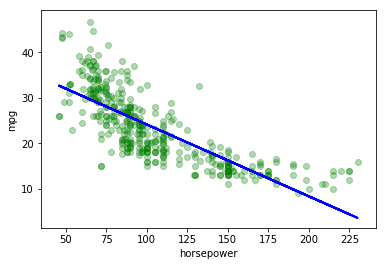

In [6]:
#(e)

import matplotlib.pyplot as plt

plt.plot(x, ols.predict(x), lw=2, color='blue')
plt.scatter(x, y, color='green', alpha=0.3)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

### Problem 3
Without using the sklearn library, calculate the coefficients manually by employing the numpy library, as well as the coefficient of determination and prediction. Note that the results should be exactly the same with the results in question (2).

In [43]:
### your solution

import numpy as np

df = pd.read_csv('Auto.csv')
x = df[['horsepower']]  
y = df[['mpg']] 

x = np.mat(x)
y = np.mat(y)
x = np.column_stack((np.ones([x.shape[0], 1]), x))

# coefficients:

coef = (x.T*x).I * x.T * y
print 'coefficients: \n %s' %str(coef)

# prediction:

x_98 = [[1, 98]]
x_98 = np.mat(x_98)
print "predicted mpg for horsepower of 98 is: %s" %str(x_98*coef)



coefficients: 
 [[ 39.93586102]
 [ -0.15784473]]
predicted mpg for horsepower of 98 is: [[ 24.46707715]]
